# importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from helper_func import get_unique_values, plot_continuous_distribution, plot_categorical_distribution, correlation_plot, skewed, plot_continuous_distribution_and_skewness

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# load data

In [2]:
path = "/Internship/Task 3 Startup success rate Prediction/Startups Success Rate Prediction/data/startup data.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
data =df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

#### Drop columns
The columns 'Unnamed: 0', 'Unnamed: 6', 'id', 'object_id', 'latitude', 'longitude','zip_code', 'state_code.1', and "status" are being removed from the dataset since they uniquely identify each info no useful data for predicting success rate model. By removing these columns, we can concentrate on the important characteristics that help predict rate and increase the effectiveness of our study.

In [6]:
# droping unwanted columns
df.drop(['Unnamed: 0', 'Unnamed: 6', 'id', 'object_id', 'latitude', 'longitude','zip_code', 'state_code.1', 'status'], 
        axis= 1, inplace=True)

In [7]:
#status = round(df['status'].value_counts(normalize=True) * 100,2)
labels = round(df['labels'].value_counts(normalize=True)*100,2)
#print(status)
print(labels)

labels
1    64.68
0    35.32
Name: proportion, dtype: float64


- 65 % of the startups have been successed and 35 % of the companies startups have failed 

In [8]:
# categorical features
categorical_cols = df.dtypes[df.dtypes==object].index.to_list()
print(f'Number of categorical columns:- {len(categorical_cols)}')

# neumerical features
neumeric_cols = df.dtypes[df.dtypes!=object].index.to_list()
print(f'Number of neumerical columns:- {len(neumeric_cols)}')

Number of categorical columns:- 8
Number of neumerical columns:- 32


In [9]:
categorical_cols

['state_code',
 'city',
 'name',
 'founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'category_code']

## Categorical Columns

### 1.1 state_code

- maximum startups success rate was in CA state_code follwed by NY state_code 53 % and 11 % respectively
- in rest of the state codes the success rate was minimul

In [10]:
get_unique_values(data=df, column='state_code')

Column: state_code has 35 unique values

state_code
CA    52.871073
NY    11.484290
MA     8.992416
TX     4.550379
WA     4.550379
CO     2.058505
IL     1.950163
PA     1.841820
VA     1.408451
GA     1.191766
NC     0.758397
OR     0.758397
NJ     0.758397
MD     0.758397
FL     0.650054
OH     0.650054
MN     0.541712
DC     0.433369
CT     0.433369
TN     0.325027
RI     0.325027
UT     0.325027
MI     0.325027
MO     0.216685
NH     0.216685
KY     0.216685
ME     0.216685
NV     0.216685
IN     0.216685
AZ     0.216685
WV     0.108342
NM     0.108342
ID     0.108342
AR     0.108342
WI     0.108342
Name: proportion, dtype: float64


state_code  labels
AR          0         100.000000
AZ          1          50.000000
            0          50.000000
CA          1          68.032787
            0          31.967213
                         ...    
VA          0          46.153846
WA          1          57.142857
            0          42.857143
WI          0         100.000000
WV          0         100.000000
Name: proportion, Length: 62, dtype: float64

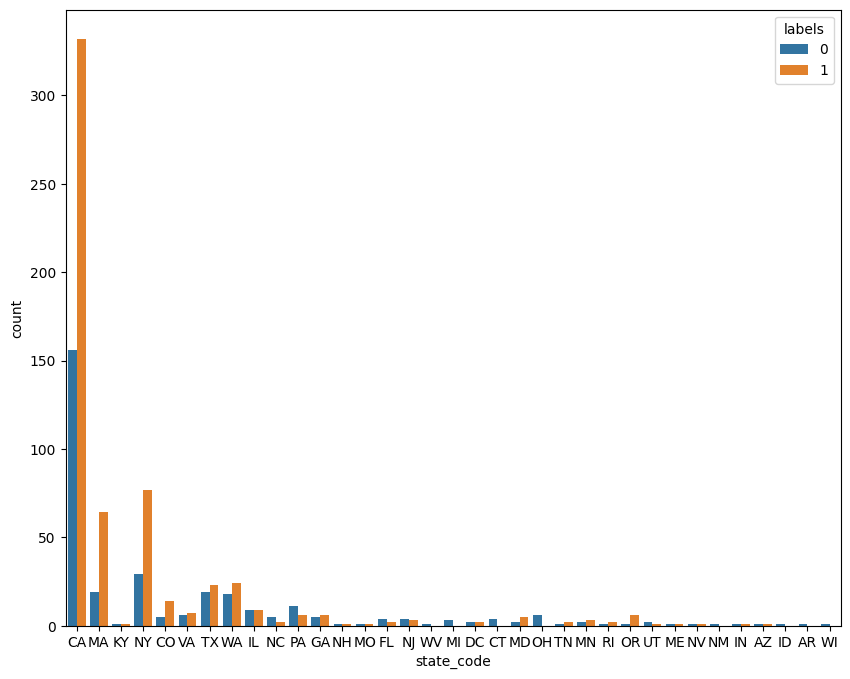

In [11]:
plt.figure(figsize=(10,8))
plot_categorical_distribution(data=df, column='state_code', hue="labels")

## 1.2 city
- there are 221 unique values present in `city` column
- majority of the startup success rate was made in San Fransisco (around 14% success)
- followed by newyork (around 10 % success)

In [12]:
get_unique_values(data=df, column='city')

Column: city has 221 unique values

city
San Francisco     13.867822
New York           9.859155
Mountain View      5.092091
Palo Alto          3.791983
Santa Clara        2.925244
                    ...    
Solana Beach       0.108342
Bala Cynwyd        0.108342
Evanston           0.108342
West Hollywood     0.108342
Middleton          0.108342
Name: proportion, Length: 221, dtype: float64


<AxesSubplot: xlabel='count', ylabel='city'>

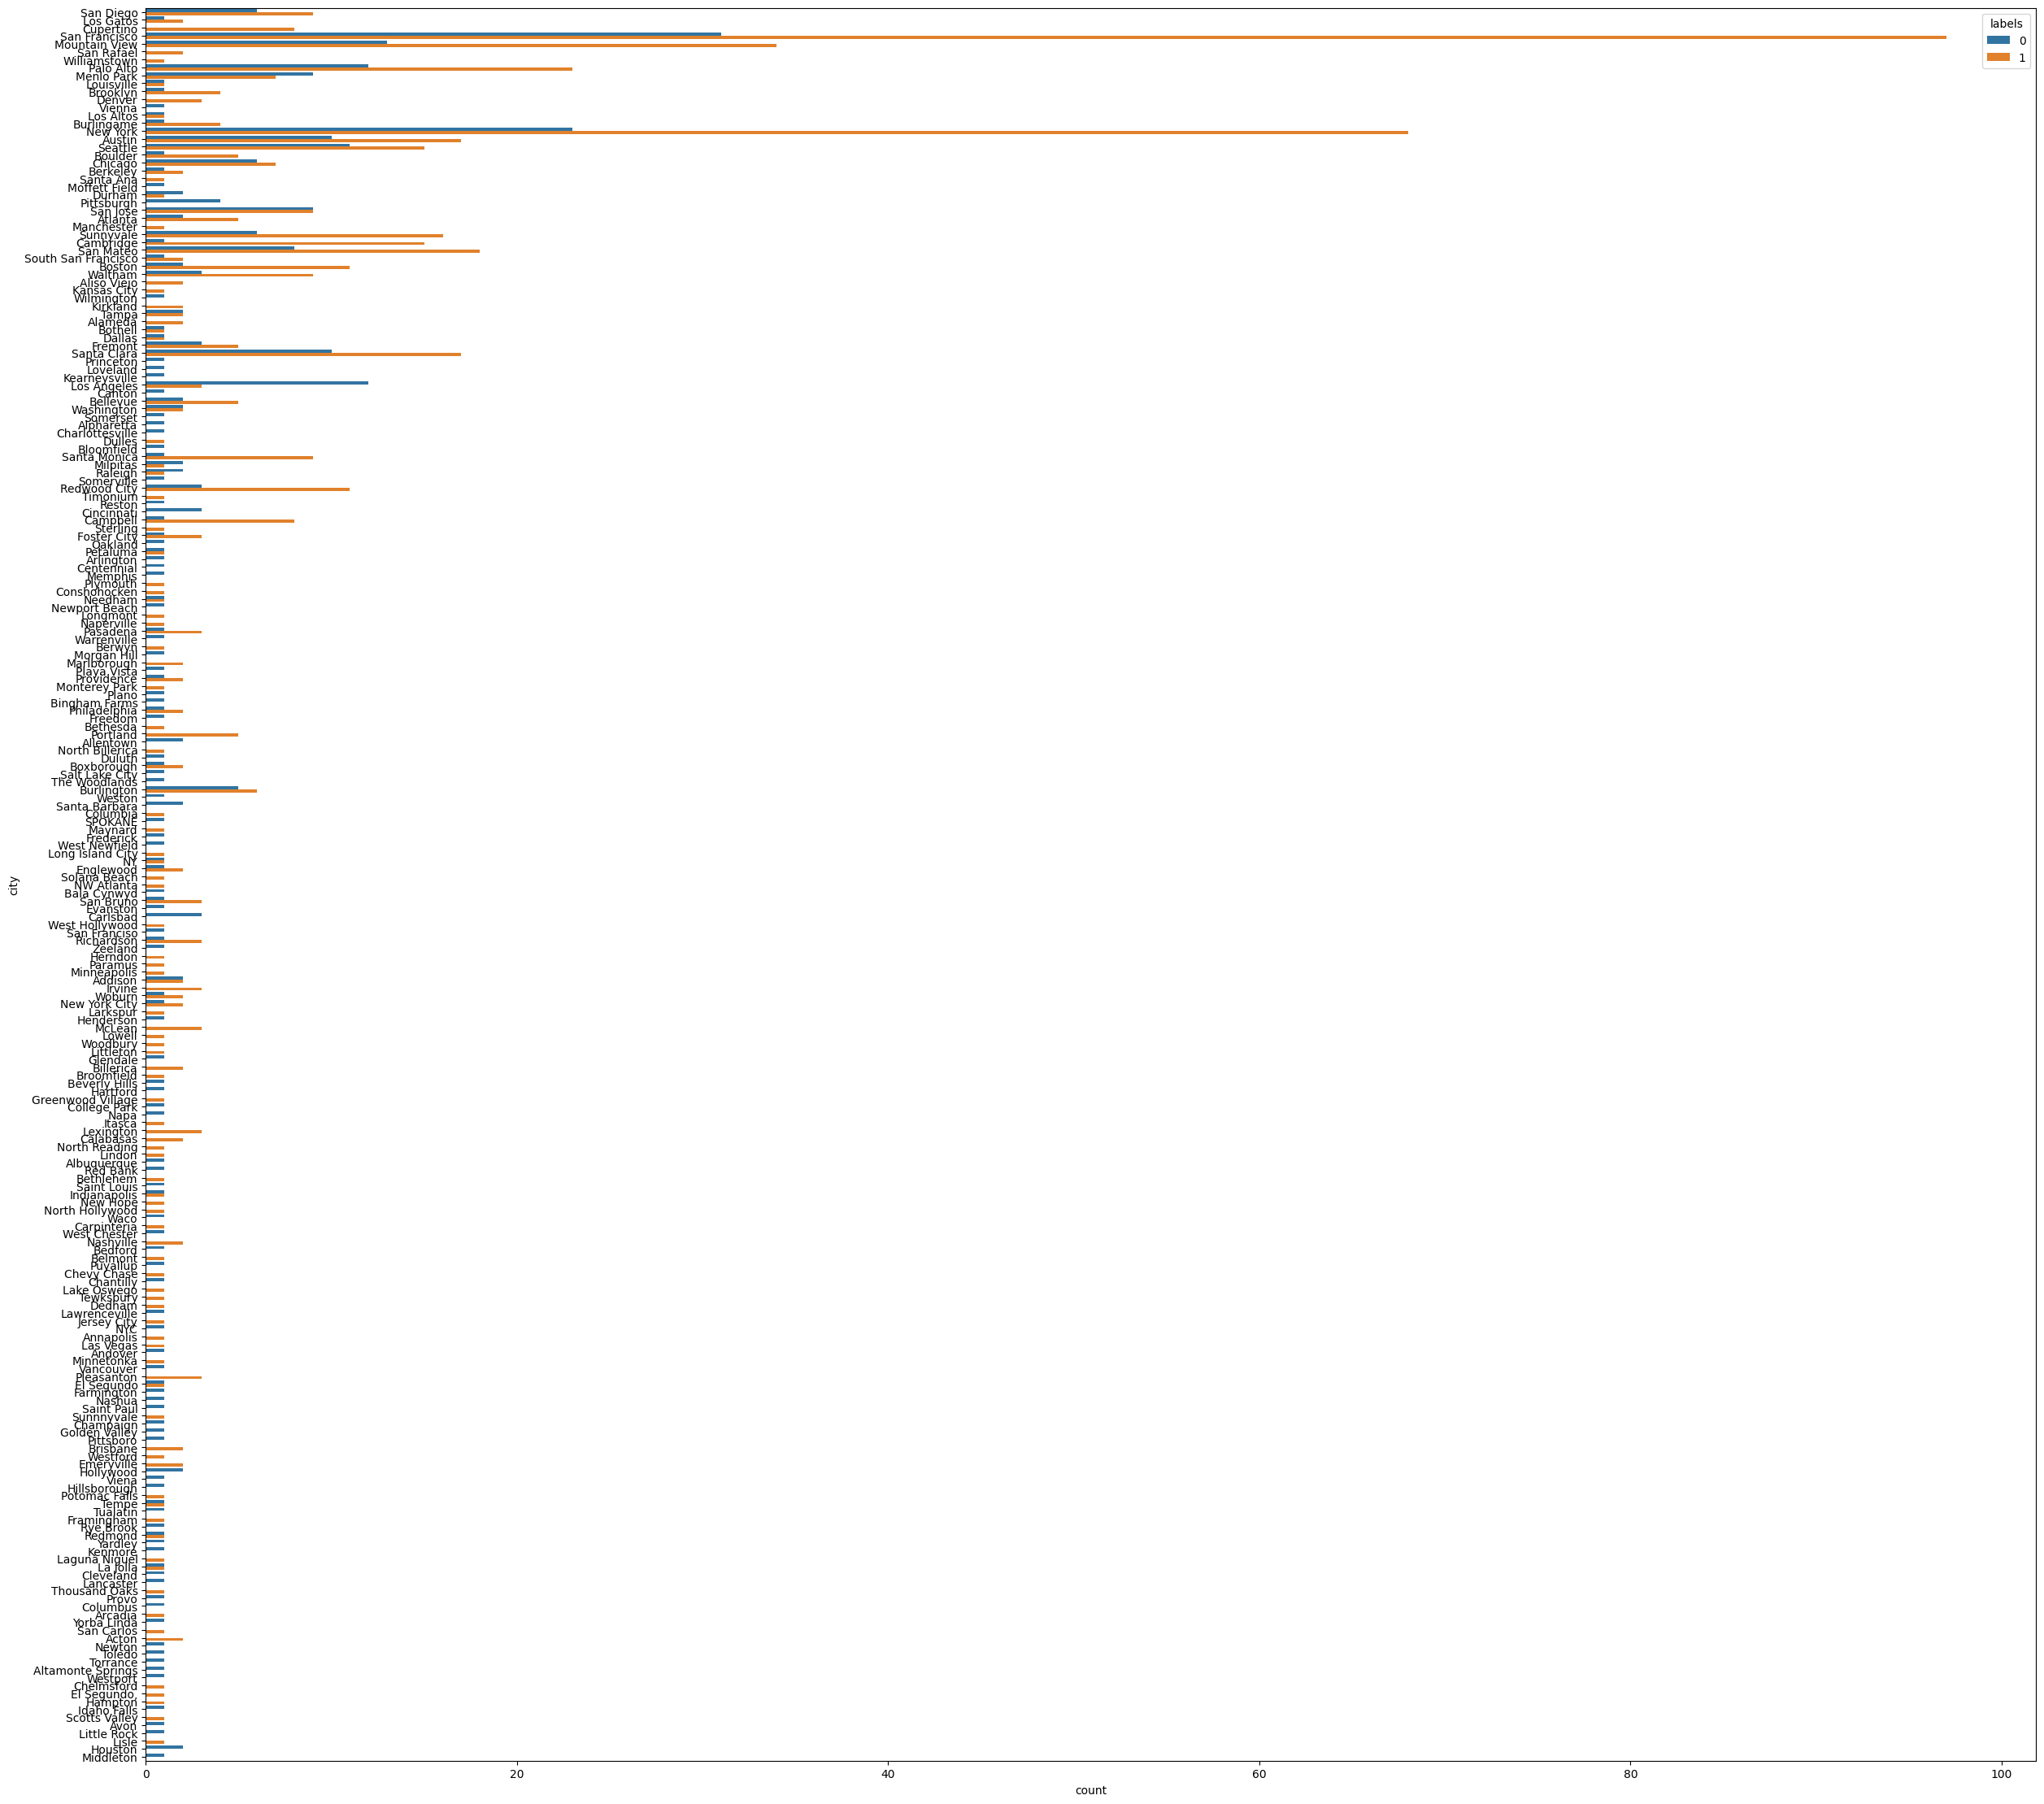

In [13]:
plt.figure(figsize=(30,28))
sns.countplot(data = df, y='city', hue='labels')

### 1.3 name

In [14]:
get_unique_values(data=df, column='name')

Column: name has 922 unique values

name
Redwood Systems         0.216685
Bandsintown             0.108342
xkoto                   0.108342
Jobs2Web                0.108342
HighlightCam            0.108342
                          ...   
Powerset                0.108342
Kiptronic               0.108342
Cozi Group              0.108342
Likewise Software       0.108342
Asempra Technologies    0.108342
Name: proportion, Length: 922, dtype: float64


In [15]:
categorical_cols

['state_code',
 'city',
 'name',
 'founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'category_code']

### 1.4 founded_at
- need to transfrom into datetime dtype column

In [16]:
get_unique_values(data=df, column='founded_at')

Column: founded_at has 217 unique values

founded_at
1/1/2003      5.958830
1/1/2002      5.850488
1/1/2005      5.850488
1/1/2006      5.850488
1/1/2000      5.742145
                ...   
7/1/2006      0.108342
3/3/2005      0.108342
10/11/2004    0.108342
11/11/2011    0.108342
9/6/2006      0.108342
Name: proportion, Length: 217, dtype: float64


### 1.5 closed_at
- need to transform datetime dtype column

In [17]:
get_unique_values(df, 'closed_at')

Column: closed_at has 202 unique values

closed_at
6/1/2013     7.462687
1/1/2012     7.164179
7/1/2013     4.477612
5/1/2013     3.582090
1/1/2011     2.388060
               ...   
2/7/2011     0.298507
4/23/2009    0.298507
2/1/2010     0.298507
8/2/2013     0.298507
6/17/2012    0.298507
Name: proportion, Length: 202, dtype: float64


### 1.6 first_funding_at
- need to transform datetime dtype column

In [18]:
get_unique_values(df, 'first_funding_at')

Column: first_funding_at has 585 unique values

first_funding_at
1/1/2008      1.950163
1/1/2007      1.733478
1/1/2006      1.300108
3/1/2006      1.083424
12/1/2006     0.975081
                ...   
4/16/2009     0.108342
12/20/2002    0.108342
11/7/2006     0.108342
10/2/2010     0.108342
10/5/2009     0.108342
Name: proportion, Length: 585, dtype: float64


### 1.9 last_funding_at
- need to transform datetime dtype column

In [19]:
get_unique_values(df, 'last_funding_at')

Column: last_funding_at has 680 unique values

last_funding_at
1/1/2008      1.191766
1/1/2012      0.650054
9/1/2008      0.650054
12/1/2007     0.650054
8/1/2010      0.541712
                ...   
4/30/2009     0.108342
12/27/2012    0.108342
6/5/2008      0.108342
7/2/2013      0.108342
6/29/2007     0.108342
Name: proportion, Length: 680, dtype: float64


### 1.10 category_code
- The most unique values in the category_code column are software and web at 17 % and 16 % respectively
- it tells us that the majority of success rate were in this startups

In [20]:
get_unique_values(df, 'category_code')

Column: category_code has 35 unique values

category_code
software            16.576381
web                 15.601300
mobile               8.559047
enterprise           7.908992
advertising          6.717226
games_video          5.633803
semiconductor        3.791983
network_hosting      3.683640
biotech              3.683640
hardware             2.925244
ecommerce            2.708559
public_relations     2.708559
cleantech            2.491874
security             2.058505
analytics            2.058505
social               1.516793
search               1.300108
other                1.191766
messaging            1.191766
fashion              0.866739
travel               0.866739
news                 0.866739
medical              0.758397
photo_video          0.758397
music                0.650054
finance              0.650054
education            0.433369
consulting           0.325027
real_estate          0.325027
health               0.325027
automotive           0.216685
manufacturin

<AxesSubplot: xlabel='count', ylabel='category_code'>

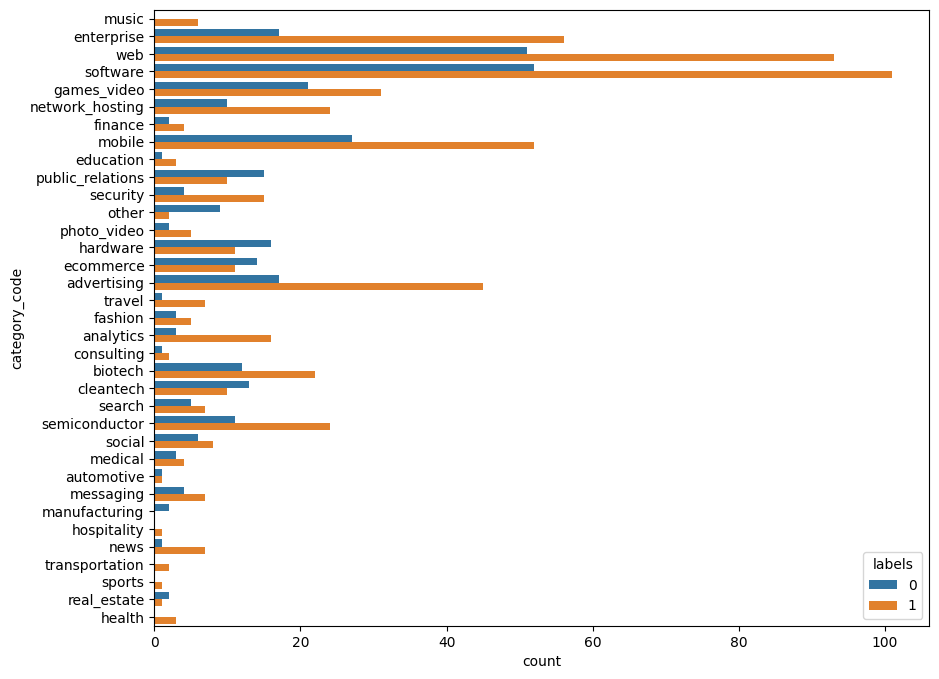

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, y='category_code', hue='labels')

## 2 Neumerical Columns

In [22]:
neumeric_cols

['labels',
 'age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'is_CA',
 'is_NY',
 'is_MA',
 'is_TX',
 'is_otherstate',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory',
 'has_VC',
 'has_angel',
 'has_roundA',
 'has_roundB',
 'has_roundC',
 'has_roundD',
 'avg_participants',
 'is_top500']

### 2.1 age_first_funding_year
- this column is right skewed mean = 2.235630010834236 and median = 1.4466

In [23]:
get_unique_values(df, 'age_first_funding_year')

Column: age_first_funding_year has 634 unique values

age_first_funding_year
0.0000    6.067172
1.0000    1.083424
0.7479    1.083424
0.5808    0.975081
0.0849    0.758397
            ...   
3.6986    0.108342
2.8247    0.108342
1.2384    0.108342
7.3151    0.108342
3.1205    0.108342
Name: proportion, Length: 634, dtype: float64


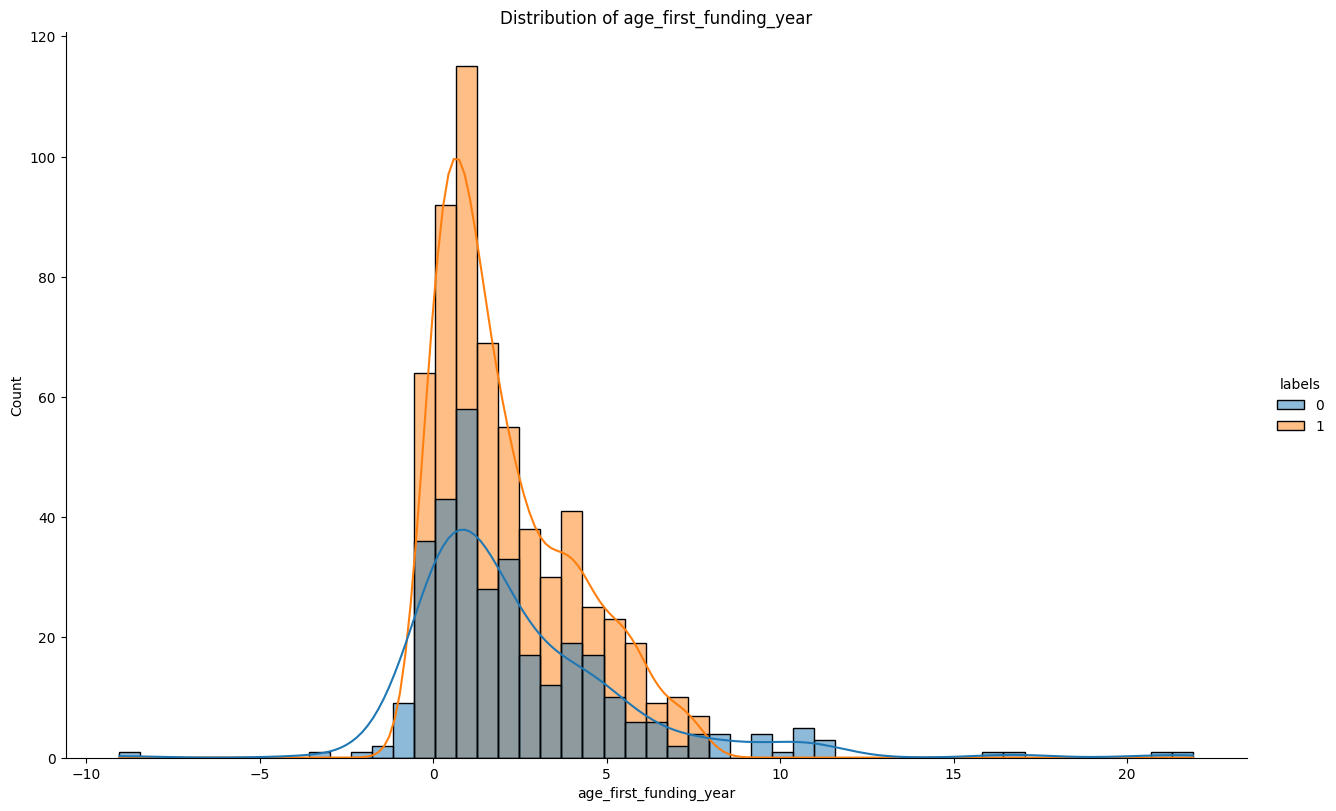

In [24]:
plot_continuous_distribution(data=df, column='age_first_funding_year', hue='labels')

In [25]:
skewed(df, 'age_first_funding_year')

Skewness for column age_first_funding_year
mean : 2.235630010834236
median : 1.4466
Right skewd Distribution mean is to the right of column age_first_funding_year
skewness > 1
 2.1040007119868047


In [26]:
neumeric_cols

['labels',
 'age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'is_CA',
 'is_NY',
 'is_MA',
 'is_TX',
 'is_otherstate',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory',
 'has_VC',
 'has_angel',
 'has_roundA',
 'has_roundB',
 'has_roundC',
 'has_roundD',
 'avg_participants',
 'is_top500']

### 2.2 age_last_funding_year

Skewness for column age_last_funding_year
mean : 3.9314557963163597
median : 3.5288
Right skewd Distribution mean is to the right of column age_last_funding_year
skewness > 1
 1.09207535694969


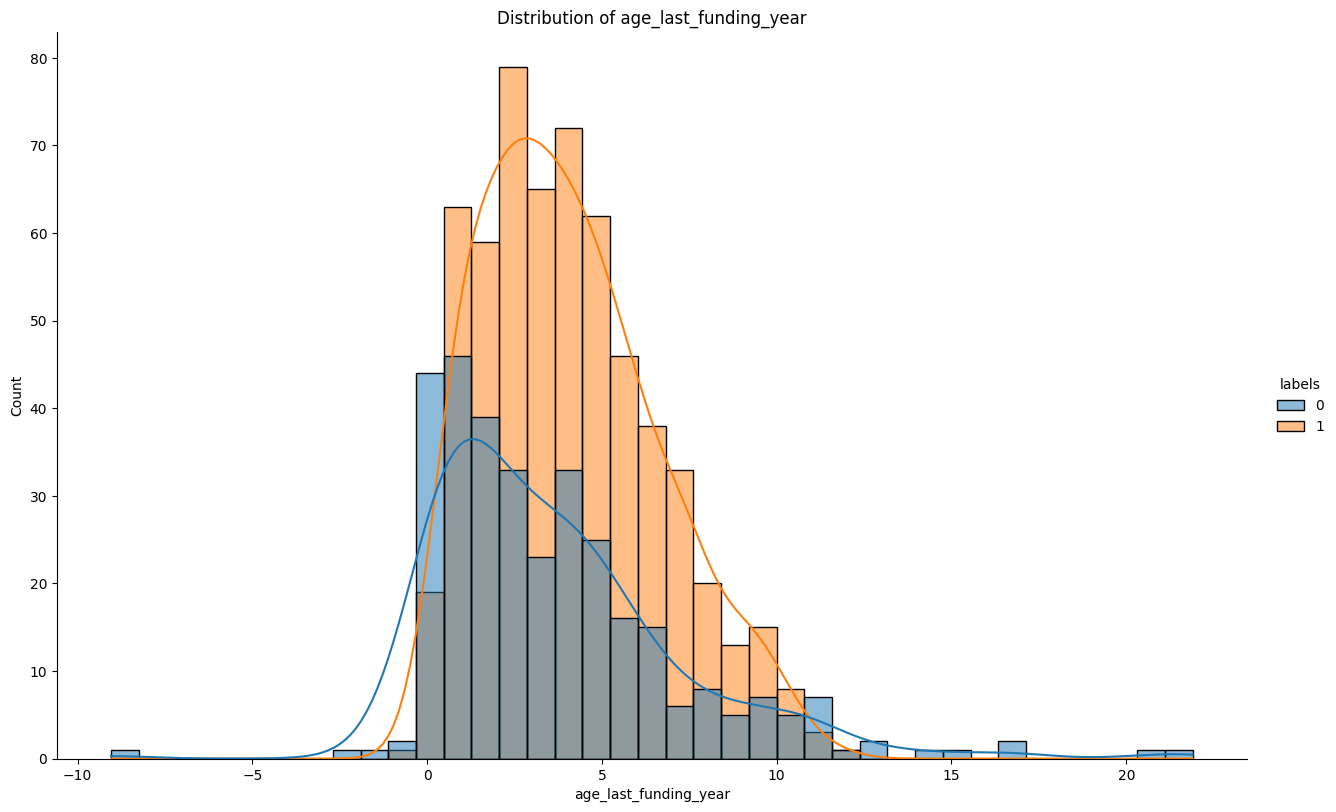

In [27]:
## plotting age_last_funding year
plot_continuous_distribution(data=df, column='age_last_funding_year', hue='labels')
# checking skewness of the column
skewed(df, 'age_last_funding_year')

## 2.3 age_first_milestone_year

Skewness for column age_first_milestone_year
mean : 3.055353047989624
median : 2.5205
Right skewd Distribution mean is to the right of column age_first_milestone_year
skewness > 1
 0.9444676662984656


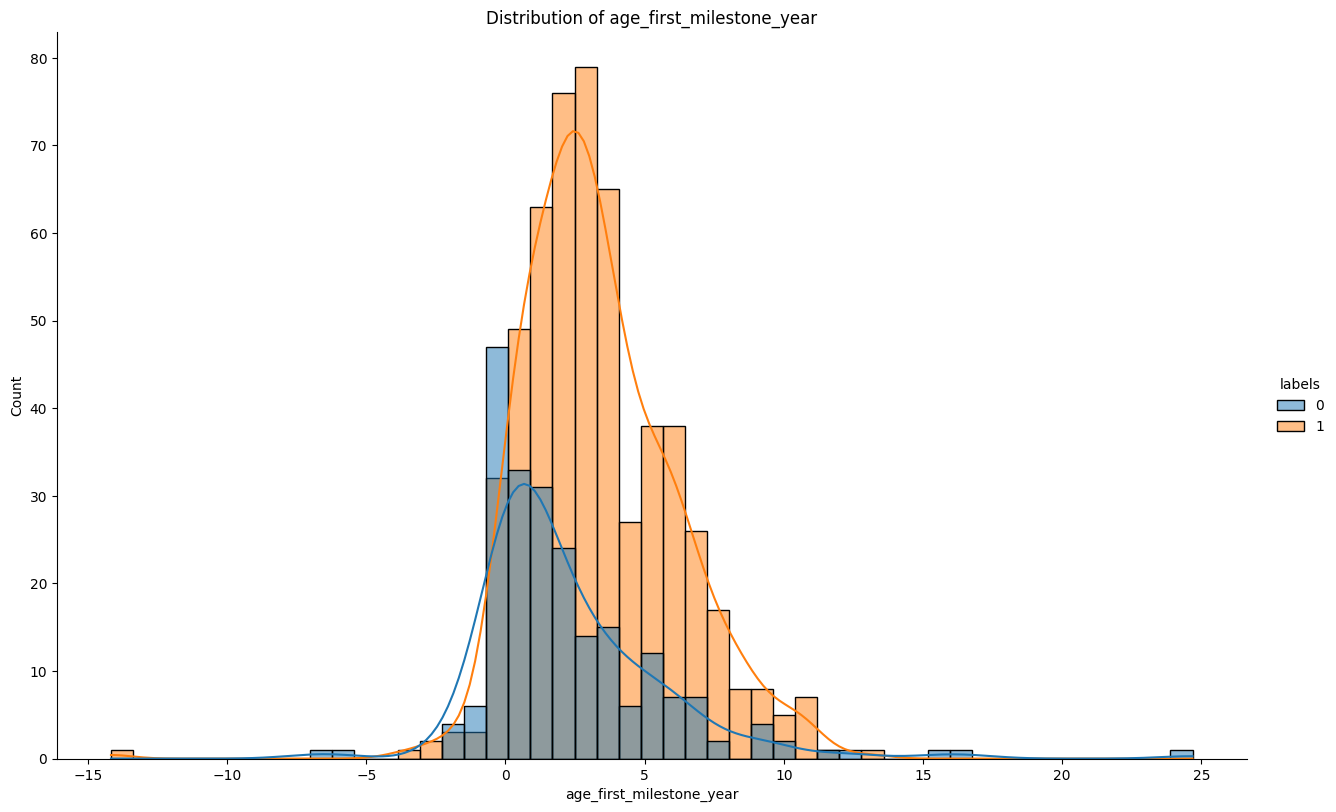

In [28]:
## plotting age_last_funding year
plot_continuous_distribution(data=df, column='age_first_milestone_year', hue='labels')
# checking skewness of the column
skewed(df, 'age_first_milestone_year')

## 2.4 age_last_milestone_year

Skewness for column age_last_milestone_year
mean : 4.754422568093385
median : 4.4767
Right skewd Distribution mean is to the right of column age_last_milestone_year
skewness > 1
 0.711933787802145


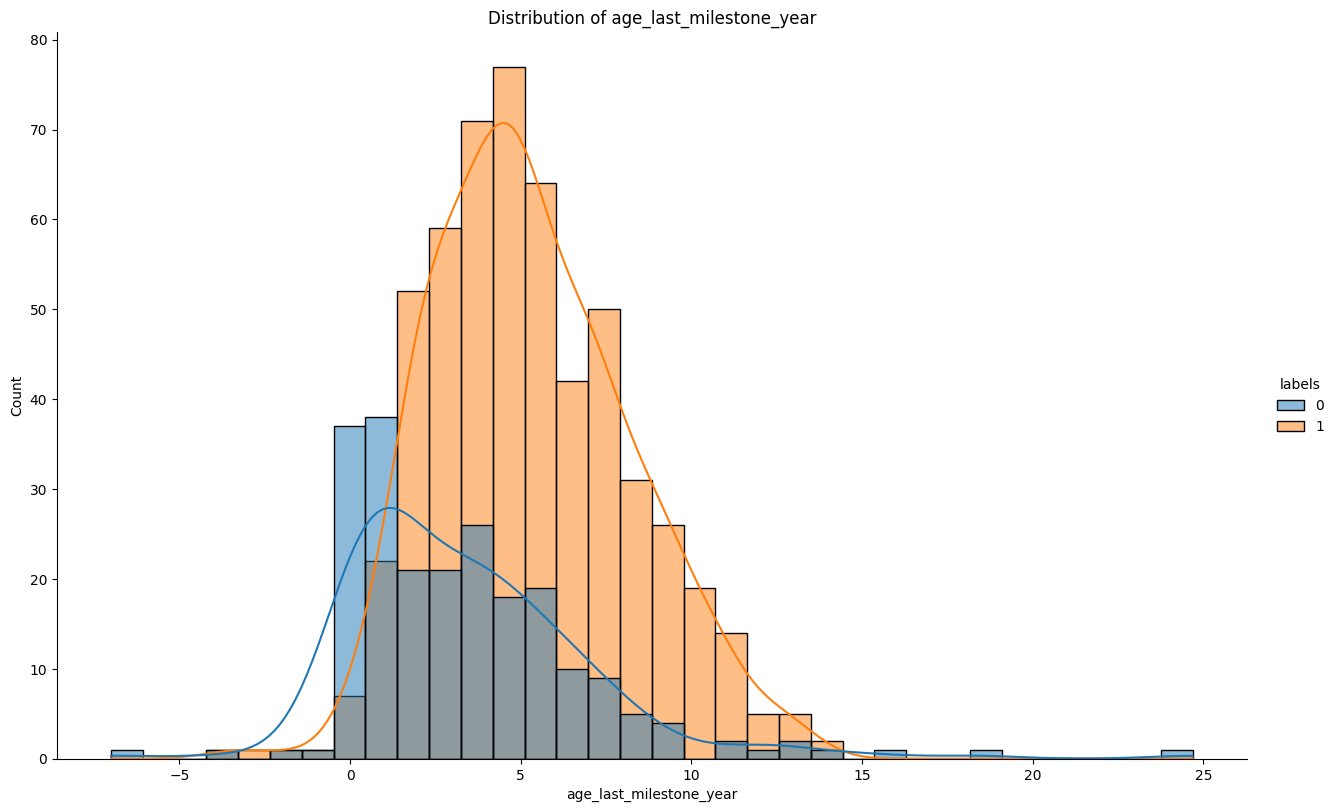

In [29]:
## plotting age_last_funding year
plot_continuous_distribution(data=df, column='age_last_milestone_year', hue='labels')
# checking skewness of the column
skewed(df, 'age_last_milestone_year')

### 2.5 NY
- the distribution of NY column is Normal , mean == median

### printing skewness of all the column 

Skewness for column age_last_milestone_year
mean : 4.754422568093385
median : 4.4767
Right skewd Distribution mean is to the right of column age_last_milestone_year
skewness > 1
 0.711933787802145


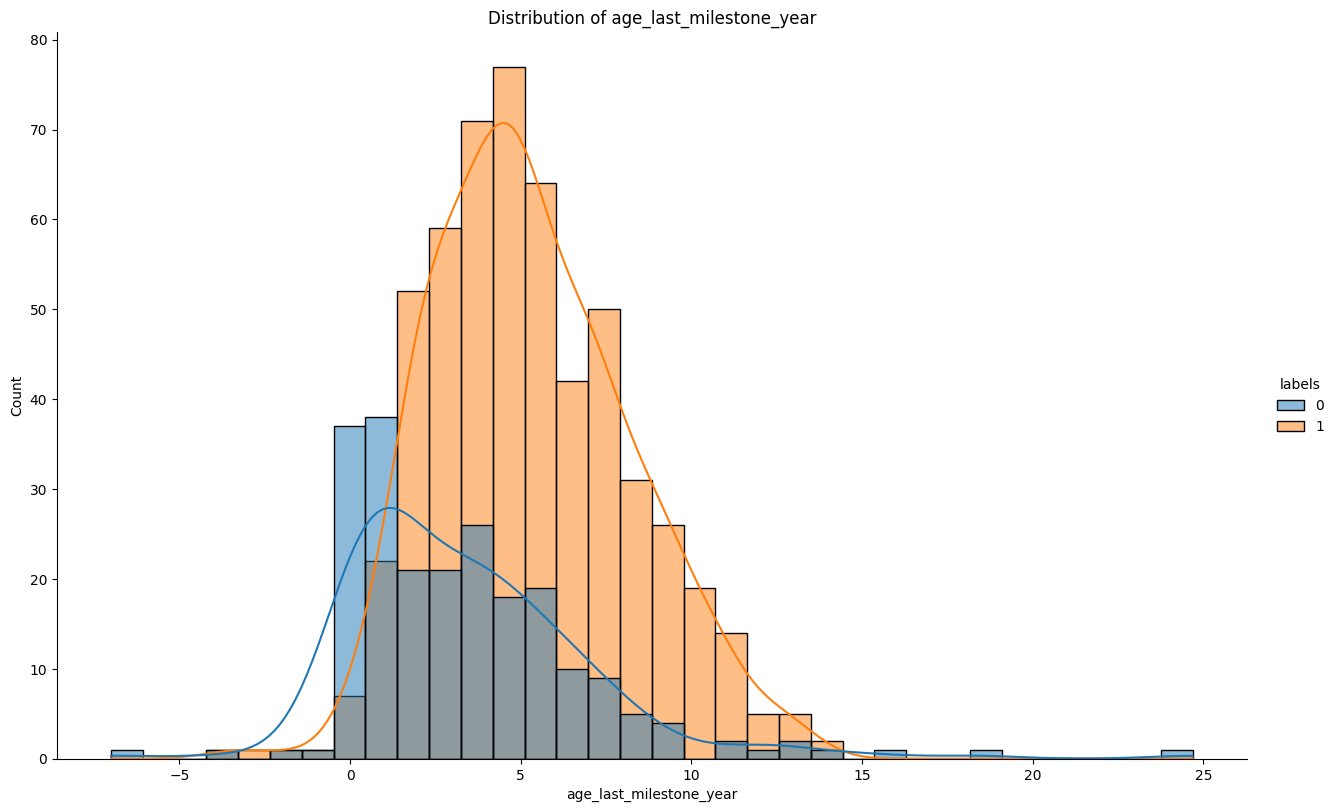

In [30]:
## plotting age_last_funding year
plot_continuous_distribution(data=df, column='age_last_milestone_year', hue='labels')
# checking skewness of the column
skewed(df, 'age_last_milestone_year')

In [31]:
for i in neumeric_cols[1:]:
    skewed(df, column=i)
    print()

Skewness for column age_first_funding_year
mean : 2.235630010834236
median : 1.4466
Right skewd Distribution mean is to the right of column age_first_funding_year
skewness > 1
 2.1040007119868047

Skewness for column age_last_funding_year
mean : 3.9314557963163597
median : 3.5288
Right skewd Distribution mean is to the right of column age_last_funding_year
skewness > 1
 1.09207535694969

Skewness for column age_first_milestone_year
mean : 3.055353047989624
median : 2.5205
Right skewd Distribution mean is to the right of column age_first_milestone_year
skewness > 1
 0.9444676662984656

Skewness for column age_last_milestone_year
mean : 4.754422568093385
median : 4.4767
Right skewd Distribution mean is to the right of column age_last_milestone_year
skewness > 1
 0.711933787802145

Skewness for column relationships
mean : 7.710725893824486
median : 5.0
Right skewd Distribution mean is to the right of column relationships
skewness > 1
 2.329961225458001

Skewness for column funding_rounds


### ploting bar graphs for all the contineous columns

In [32]:
num_cols = [
    "age_first_funding_year", "age_last_funding_year","age_first_milestone_year",
    "age_last_milestone_year", "relationships", "funding_rounds", "funding_total_usd",
    "milestones", "avg_participants", "age"
]       

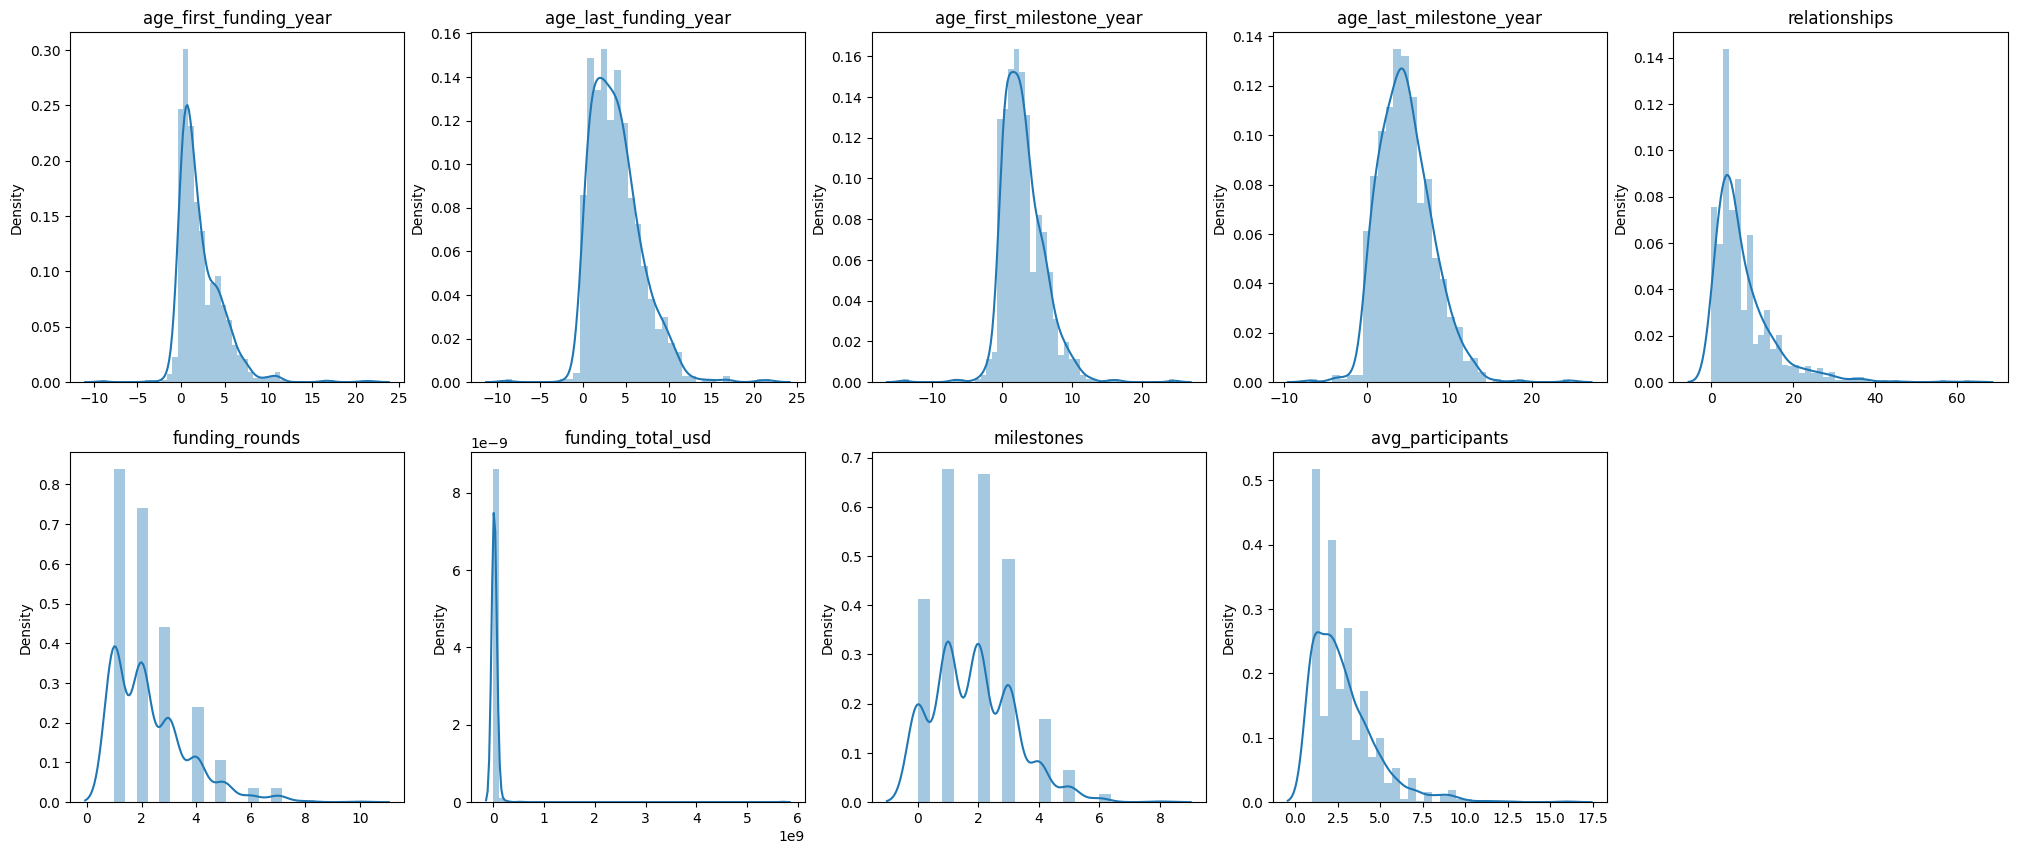

In [35]:
# now let's use distplot to see the distribution of features values
plt.figure(figsize=(25,10))
for i in range(len(num_cols)-1):
    plt.subplot(2,5,i+1)
    plt.title("{}". format(num_cols[i]))
    sns.distplot(df[num_cols[i]], axlabel=False);

In [36]:
# for i in neumeric_cols[1:]:
#     plot_continuous_distribution(data=df, column=i, hue='labels')
#     print()

### 3. Outliers
- Column with outliers 
	- [age_first_funding_year, age_last_funding_year, age_first_milestone_year, age_last_milestone_year, relationships, funding_rounds, funding_total_usd, milestones, is_CA, is_othercategory, has_VC, has_angel, has_roundA, has_roundB, avg_participants]
    
- No outliers in columns
	- ['is_NY',
 'is_MA',
 'is_TX',
 'is_otherstate',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'has_roundC',
 'has_roundD',
 'is_top500']


In [37]:
def get_iqr_range(data:pd.DataFrame=None, column:str=None, per_1 = 0.25, per_2=0.75):
    """This funcition will get the upper and lower limit to detect the ouliers
    This method is known as Inter Quantile Range (IQR)"""
    
    Q1 = data[column].quantile(per_1)
    Q3 = data[column].quantile(per_2)
    
    IQR =  Q3 - Q1
    
    upper_tail = Q3 + 1.5 * IQR
    lower_tail = Q1 - 1.5 * IQR
    print(f"Column Name:- '{column}'")
    print(f"for Normal Outliers :- \nIQR :- {IQR}\nupper tail = {upper_tail}\nLower_tail = {lower_tail}")
    return upper_tail, lower_tail

In [38]:
with_out = ['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 
            'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_othercategory', 
            'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'avg_participants']
no_out = [i for i in neumeric_cols if i not in with_out]
print(no_out)

['labels', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'has_roundC', 'has_roundD', 'is_top500']


In [39]:
for i in range(len(neumeric_cols[1:])):
    get_iqr_range(data=df, column=neumeric_cols[i+1])
    print()

Column Name:- 'age_first_funding_year'
for Normal Outliers :- 
IQR :- 2.9986500000000005
upper tail = 8.073325
Lower_tail = -3.9212750000000005

Column Name:- 'age_last_funding_year'
for Normal Outliers :- 
IQR :- 3.8903999999999996
upper tail = 11.39585
Lower_tail = -4.165749999999999

Column Name:- 'age_first_milestone_year'
for Normal Outliers :- 
IQR :- 3.6863
upper tail = 10.21575
Lower_tail = -4.529450000000001

Column Name:- 'age_last_milestone_year'
for Normal Outliers :- 
IQR :- 4.3424
upper tail = 13.267
Lower_tail = -4.102599999999999

Column Name:- 'relationships'
for Normal Outliers :- 
IQR :- 7.0
upper tail = 20.5
Lower_tail = -7.5

Column Name:- 'funding_rounds'
for Normal Outliers :- 
IQR :- 2.0
upper tail = 6.0
Lower_tail = -2.0

Column Name:- 'funding_total_usd'
for Normal Outliers :- 
IQR :- 22000000.0
upper tail = 57725000.0
Lower_tail = -30275000.0

Column Name:- 'milestones'
for Normal Outliers :- 
IQR :- 2.0
upper tail = 6.0
Lower_tail = -2.0

Column Name:- 'is_C

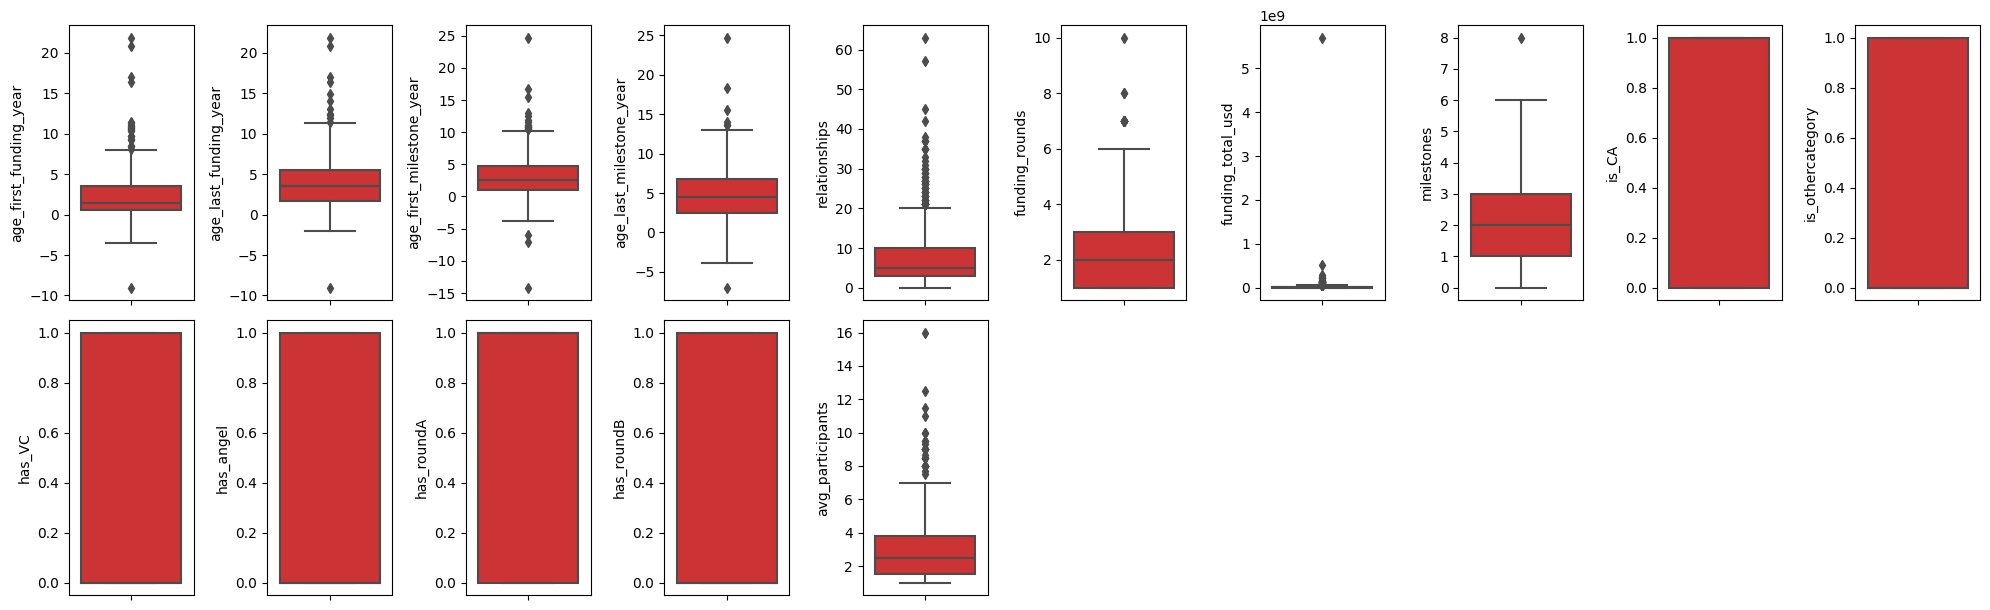

In [40]:
# look at the distribution of data with boxplot
# We only use continuous variables and exclude the boolean value
plt.figure(figsize=(20,15))
features = with_out
for i in range(0, len(features)):
    plt.subplot(5, 10, i+1)
    sns.boxplot(y=df[features[i]],palette='Set1',orient='v')
    plt.tight_layout()
#plt.savefig('fig/Boxplot.png', tight_box=True)

### Getting Correlation of the data
- anayzing correlations in two parts for the simplicity 

In [41]:
len(neumeric_cols)/2

16.0

<AxesSubplot: >

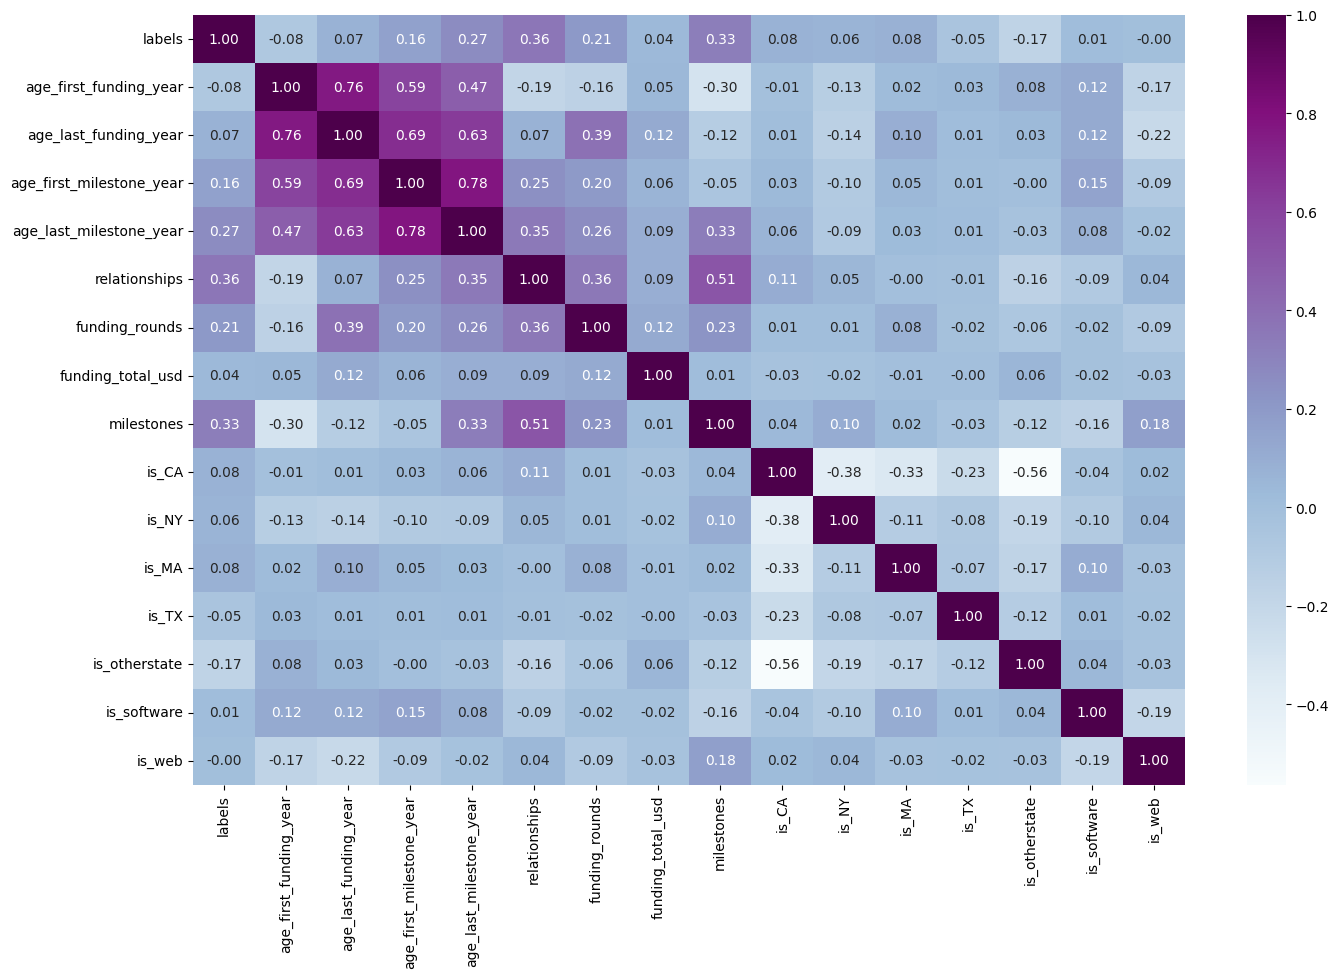

In [42]:
corr_= df[neumeric_cols[:16]].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")
#plt.savefig('fig/correlation matrix.png', tight_box=True);

As we can see here there is a positive correlation with `age_last_funding_year`, `age_first_milestone_year`, `age_last_milestone_year`, `relationship`, `funding_rounds`, `milestones`, `funding_total_usd`, `is_CA`, `is_NY`, `is_MA`, `is_software, is_mobile`, `is_enterprise`, `is_advertising`, `has_roundA`, `has_roundB`, `has_roundC`, `has_roundD`, `avg_participants`, `is_top500, and age`

<AxesSubplot: >

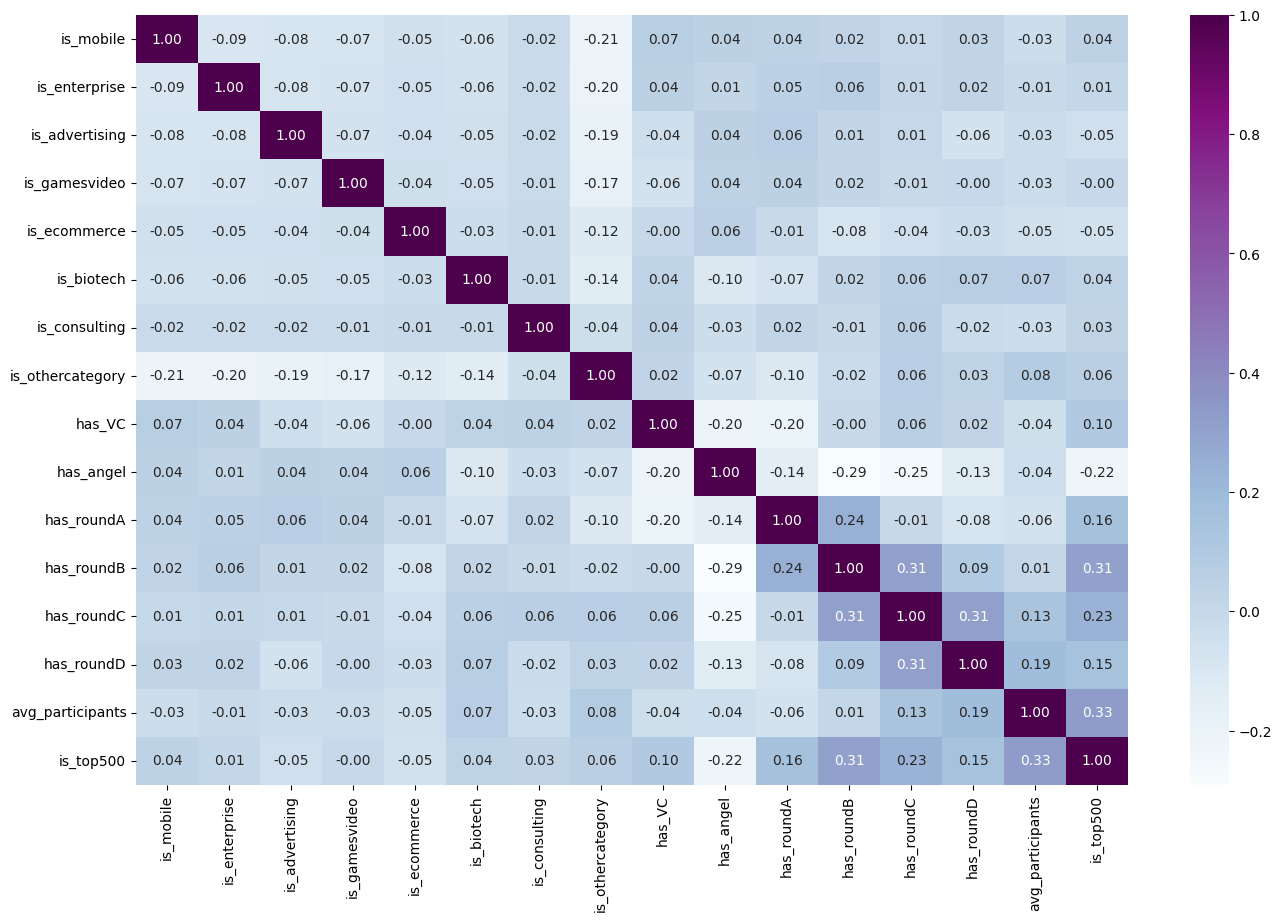

In [43]:
corr_= df[neumeric_cols[16:]].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")
#plt.savefig('fig/correlation matrix.png', tight_box=True);

### 1. Changing datatype of columns
- founded_at',
- 'closed_at',
- 'first_funding_at',
- 'last_funding_at',
- 'category_code'

In [44]:
# change column to date type
df['founded_at'] = pd.to_datetime(df.founded_at)
df['closed_at'] = pd.to_datetime(df.closed_at)
df['first_funding_at'] = pd.to_datetime(df.first_funding_at)
df['last_funding_at'] = pd.to_datetime(df.last_funding_at)

df.head(3)

,state_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,CA,San Diego,Bandsintown,1,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,...,0,1,0,1,0,0,0,0,1.00,0
1,CA,Los Gatos,TriCipher,1,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,...,0,0,1,0,0,1,1,1,4.75,1
2,CA,San Diego,Plixi,1,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,...,0,0,0,0,1,0,0,0,4.00,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                923 non-null    object        
 1   city                      923 non-null    object        
 2   name                      923 non-null    object        
 3   labels                    923 non-null    int64         
 4   founded_at                923 non-null    datetime64[ns]
 5   closed_at                 335 non-null    datetime64[ns]
 6   first_funding_at          923 non-null    datetime64[ns]
 7   last_funding_at           923 non-null    datetime64[ns]
 8   age_first_funding_year    923 non-null    float64       
 9   age_last_funding_year     923 non-null    float64       
 10  age_first_milestone_year  771 non-null    float64       
 11  age_last_milestone_year   771 non-null    float64       
 12  relationships         

#### Removing missing values

In [46]:
cols = df.isna().sum().index

In [47]:
cols_ind = np.where(df.isna().sum()!=0)
print(cols_ind)
df[[cols[5], cols[10], cols[11]]].isna().sum()*100/len(df)

(array([ 5, 10, 11], dtype=int64),)


closed_at                   63.705309
age_first_milestone_year    16.468039
age_last_milestone_year     16.468039
dtype: float64

#### closed_at

In [48]:
# fill missing value in closed_at with closed_at + 1 day so we know that the startup haven't been failed yet
from datetime import timedelta
df['closed_at'] = df['closed_at'].fillna(df['closed_at'].max() + timedelta(days=1))

##### creating 'age' column

In [49]:
# Assign startup age in days to age column
df['age'] = df['closed_at'] - df['founded_at']
# age from success startup
df['age'].max() 

Timedelta('10368 days 00:00:00')

In [50]:
df['age'] = df['age'].astype(str)
df[['age','suffix']] = df['age'].str.split(" ",expand=True)
df.head()

,state_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,age,suffix
0,CA,San Diego,Bandsintown,1,2007-01-01,2013-10-31,2009-04-01,2010-01-01,2.2493,3.0027,...,0,1,0,0,0,0,1.0000,0,2495,days
1,CA,Los Gatos,TriCipher,1,2000-01-01,2013-10-31,2005-02-14,2009-12-28,5.1260,9.9973,...,1,0,0,1,1,1,4.7500,1,5052,days
2,CA,San Diego,Plixi,1,2009-03-18,2013-10-31,2010-03-30,2010-03-30,1.0329,1.0329,...,0,0,1,0,0,0,4.0000,1,1688,days
3,CA,Cupertino,Solidcore Systems,1,2002-01-01,2013-10-31,2005-02-17,2007-04-25,3.1315,5.3151,...,0,0,0,1,1,1,3.3333,1,4321,days
4,CA,San Francisco,Inhale Digital,0,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,...,1,1,0,0,0,0,1.0000,1,792,days


In [51]:
df.drop(['suffix'], axis=1, inplace=True)
df['age'] = df['age'].astype(dtype=int,errors='ignore')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                923 non-null    object        
 1   city                      923 non-null    object        
 2   name                      923 non-null    object        
 3   labels                    923 non-null    int64         
 4   founded_at                923 non-null    datetime64[ns]
 5   closed_at                 923 non-null    datetime64[ns]
 6   first_funding_at          923 non-null    datetime64[ns]
 7   last_funding_at           923 non-null    datetime64[ns]
 8   age_first_funding_year    923 non-null    float64       
 9   age_last_funding_year     923 non-null    float64       
 10  age_first_milestone_year  771 non-null    float64       
 11  age_last_milestone_year   771 non-null    float64       
 12  relationships         

In [53]:
df['age']

0      2495
1      5052
2      1688
3      4321
4       792
       ... 
918    1764
919    3828
920    4916
921    1764
922    3956
Name: age, Length: 923, dtype: int32

In [54]:
df.head(3) 

,state_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,age
0,CA,San Diego,Bandsintown,1,2007-01-01,2013-10-31,2009-04-01,2010-01-01,2.2493,3.0027,...,1,0,1,0,0,0,0,1.00,0,2495
1,CA,Los Gatos,TriCipher,1,2000-01-01,2013-10-31,2005-02-14,2009-12-28,5.1260,9.9973,...,0,1,0,0,1,1,1,4.75,1,5052
2,CA,San Diego,Plixi,1,2009-03-18,2013-10-31,2010-03-30,2010-03-30,1.0329,1.0329,...,0,0,0,1,0,0,0,4.00,1,1688


In [55]:
# for columns with missing value i will fill it by median() function
df["age_first_milestone_year"].fillna((df["age_first_milestone_year"].median()), inplace=True)
df["age_last_milestone_year"].fillna((df["age_last_milestone_year"].median()), inplace=True)

In [56]:
# we must get the absolute value of this four columns
df["age_first_funding_year"]=np.abs(df["age_first_funding_year"])
df["age_last_funding_year"]=np.abs(df["age_last_funding_year"])
df["age_first_milestone_year"]=np.abs(df["age_first_milestone_year"])
df["age_last_milestone_year"]=np.abs(df["age_last_milestone_year"])

In [57]:
df["age_first_funding_year"]

0      2.2493
1      5.1260
2      1.0329
3      3.1315
4      0.0000
        ...  
918    0.5178
919    7.2521
920    8.4959
921    0.7589
922    3.1205
Name: age_first_funding_year, Length: 923, dtype: float64

In [58]:
df.head()

,state_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,age
0,CA,San Diego,Bandsintown,1,2007-01-01,2013-10-31,2009-04-01,2010-01-01,2.2493,3.0027,...,1,0,1,0,0,0,0,1.0000,0,2495
1,CA,Los Gatos,TriCipher,1,2000-01-01,2013-10-31,2005-02-14,2009-12-28,5.1260,9.9973,...,0,1,0,0,1,1,1,4.7500,1,5052
2,CA,San Diego,Plixi,1,2009-03-18,2013-10-31,2010-03-30,2010-03-30,1.0329,1.0329,...,0,0,0,1,0,0,0,4.0000,1,1688
3,CA,Cupertino,Solidcore Systems,1,2002-01-01,2013-10-31,2005-02-17,2007-04-25,3.1315,5.3151,...,0,0,0,0,1,1,1,3.3333,1,4321
4,CA,San Francisco,Inhale Digital,0,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,...,0,1,1,0,0,0,0,1.0000,1,792


In [59]:
df["funding_total_usd"] = df["funding_total_usd"]/100000

In [60]:
clean_data = df.to_csv("clean_data")

## Data Transformation

### 1. Log Transformation
- TO make data normally distributed

In [61]:
features = ['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year',
            'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd',
            'milestones', 'avg_participants', 'age']
df_pre = df.copy()
for var in features:
    df['log_'+var]= (df[var]+1).apply(np.log)

In [62]:
df[['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year',
            'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd',
            'milestones', 'avg_participants', 'age']]

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,age
0,2.2493,3.0027,4.6685,6.7041,3,3,3.75,3,1.0000,2495
1,5.1260,9.9973,7.0055,7.0055,9,4,401.00,1,4.7500,5052
2,1.0329,1.0329,1.4575,2.2055,5,1,26.00,2,4.0000,1688
3,3.1315,5.3151,6.0027,6.0027,5,3,400.00,1,3.3333,4321
4,0.0000,1.6685,0.0384,0.0384,2,2,13.00,1,1.0000,792
...,...,...,...,...,...,...,...,...,...,...
918,0.5178,0.5178,0.5808,4.5260,9,1,11.00,2,6.0000,1764
919,7.2521,9.2274,6.0027,6.0027,1,3,520.00,1,2.6667,3828
920,8.4959,8.4959,9.0055,9.0055,5,1,440.00,1,8.0000,4916
921,0.7589,2.8329,0.7589,3.8356,12,2,155.00,2,1.0000,1764


In [63]:
cols_T = [
    'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 
    'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'avg_participants','age'
]

In [64]:
transormed_data_1 = df.copy()

# columns to transform 

for atr in cols_T:
    df['log_'+atr]= (df[atr]+1).apply(np.log)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   state_code                    923 non-null    object        
 1   city                          923 non-null    object        
 2   name                          923 non-null    object        
 3   labels                        923 non-null    int64         
 4   founded_at                    923 non-null    datetime64[ns]
 5   closed_at                     923 non-null    datetime64[ns]
 6   first_funding_at              923 non-null    datetime64[ns]
 7   last_funding_at               923 non-null    datetime64[ns]
 8   age_first_funding_year        923 non-null    float64       
 9   age_last_funding_year         923 non-null    float64       
 10  age_first_milestone_year      923 non-null    float64       
 11  age_last_milestone_year       92

In [66]:
trans_cols=[
    "log_age_first_funding_year", "log_age_last_funding_year","log_age_first_milestone_year",
    "log_age_last_milestone_year", "log_relationships", "log_funding_rounds", "log_funding_total_usd",
    "log_milestones", "log_avg_participants", "log_age"
]       

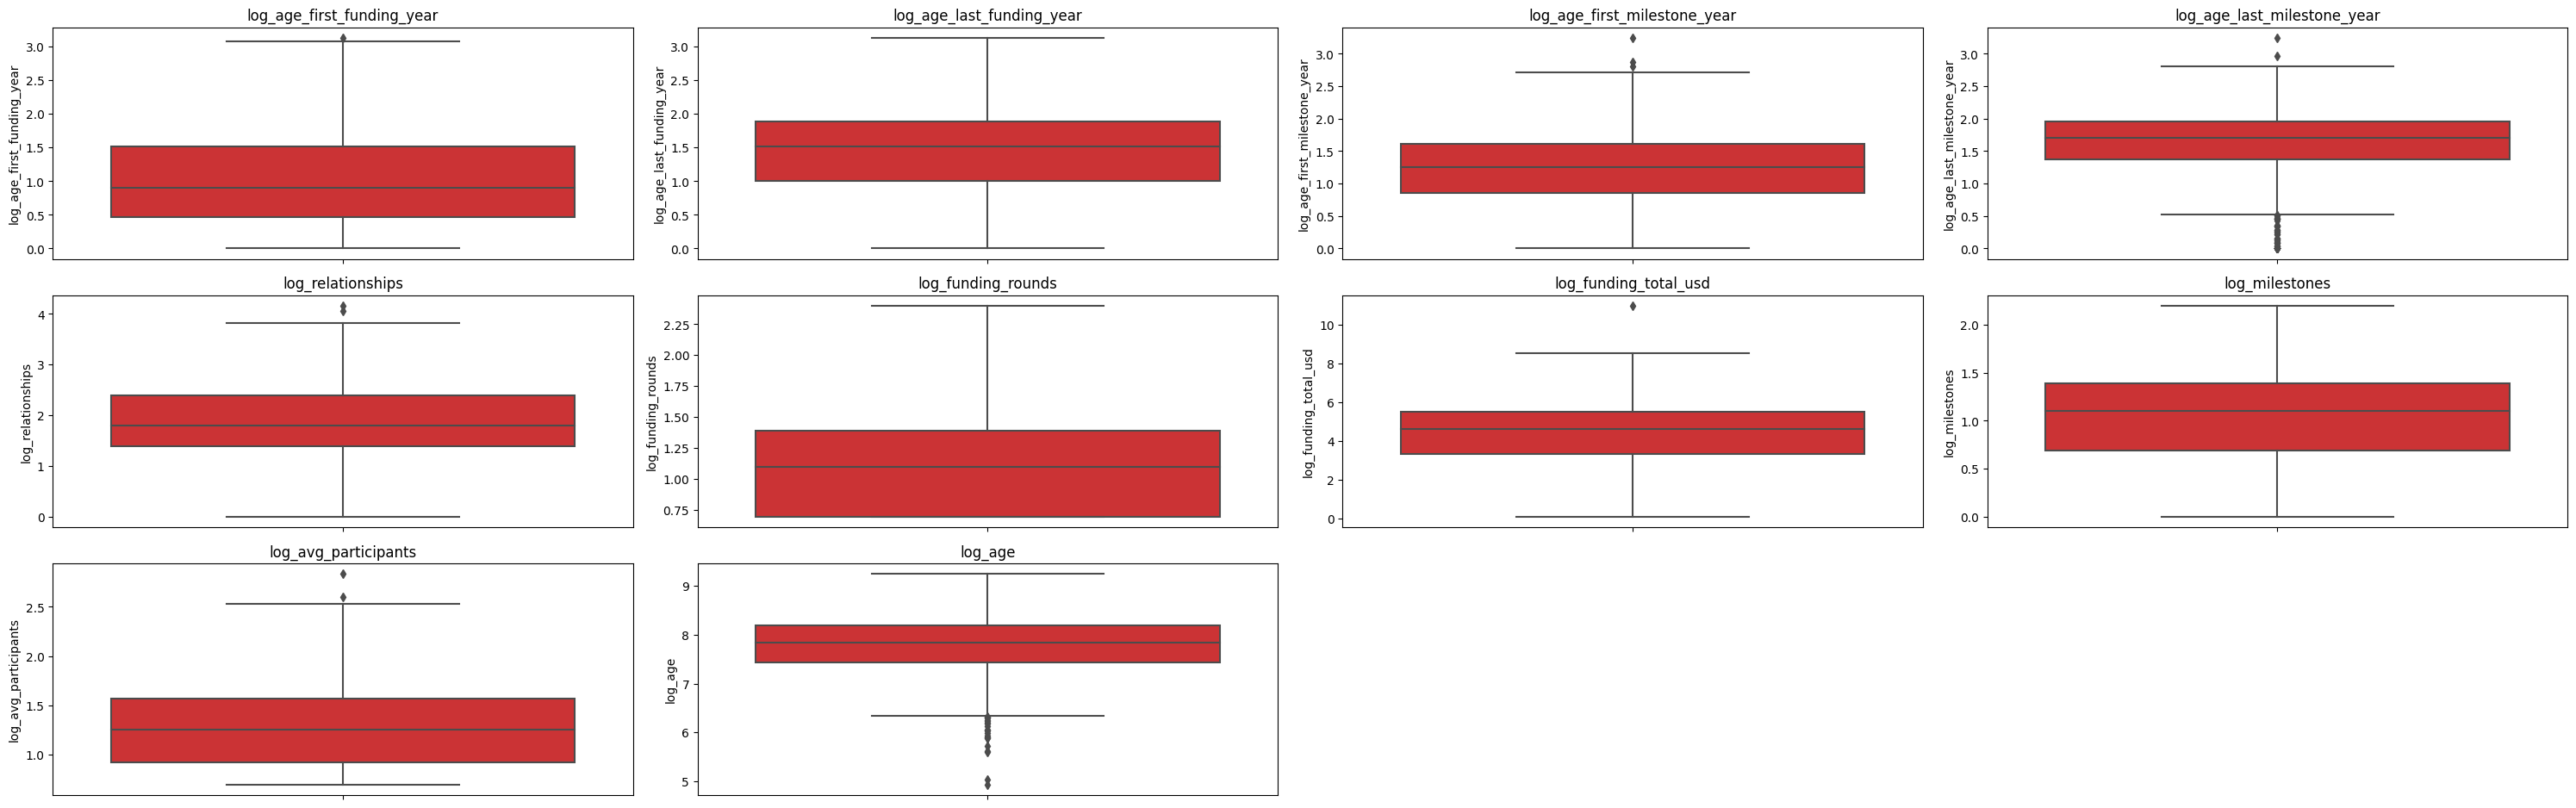

In [67]:
# now let's use distplot to see the distribution of features values
plt.figure(figsize=(30,25),dpi=100)
for i in range(len(trans_cols)):
    plt.subplot(8,4,i+1)
    plt.title("{}". format(trans_cols[i]))
    sns.boxplot(y=df[trans_cols[i]],palette='Set1',orient='v')
    plt.tight_layout()

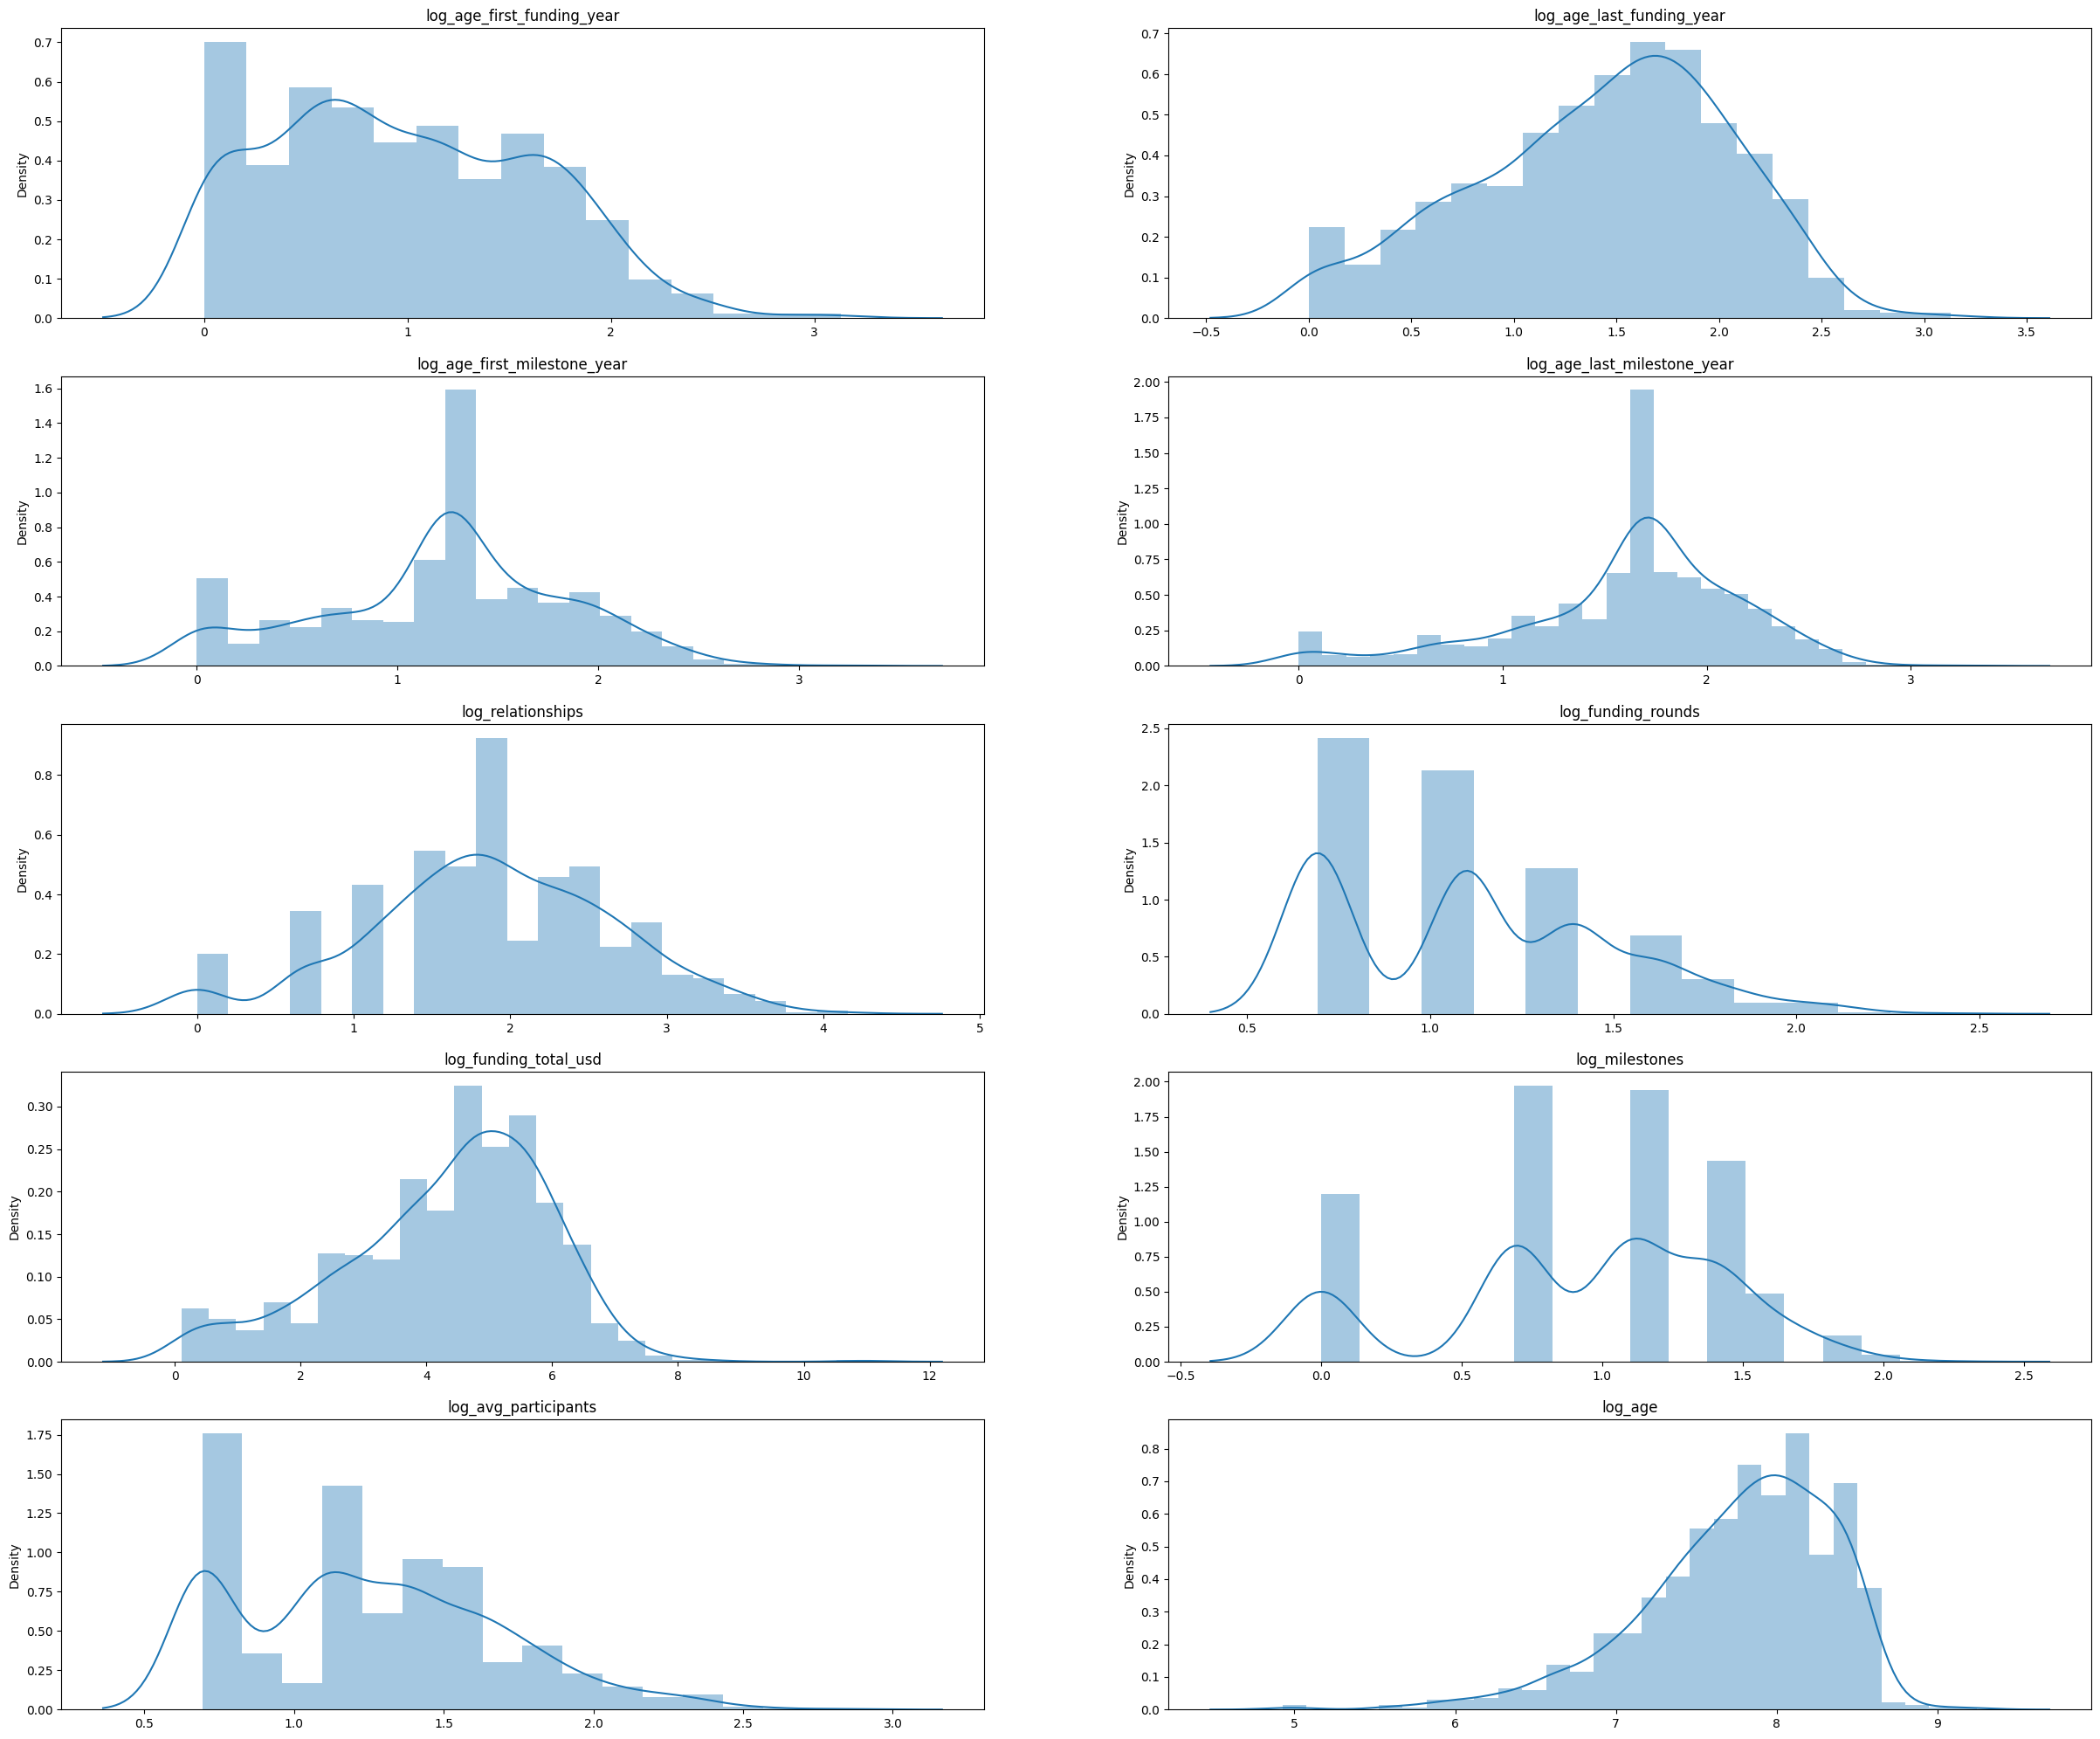

In [68]:
# now let's use distplot to see the distribution of features values
plt.figure(figsize=(30,25),dpi=100)
for i in range(len(trans_cols)):
    plt.subplot(5,2,i+1)
    plt.title("{}". format(trans_cols[i]))
    sns.distplot(df[trans_cols[i]], axlabel=False)

#### Normallize the data

In [69]:
features = ['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year',
            'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd',
            'milestones', 'avg_participants', 'age']

In [70]:
from sklearn.preprocessing import MinMaxScaler

for var in features:
    scaler = MinMaxScaler()
    scl_df = scaler.fit_transform(df[var].values.reshape(len(df),1))
    df['nor_'+var] = scl_df

In [71]:
df.head(3)

,state_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,nor_age_first_funding_year,nor_age_last_funding_year,nor_age_first_milestone_year,nor_age_last_milestone_year,nor_relationships,nor_funding_rounds,nor_funding_total_usd,nor_milestones,nor_avg_participants,nor_age
0,CA,San Diego,Bandsintown,1,2007-01-01,2013-10-31,2009-04-01,2010-01-01,2.2493,3.0027,...,0.102727,0.137135,0.189124,0.271587,0.047619,0.222222,0.000064,0.375,0.00,0.407600
1,CA,Los Gatos,TriCipher,1,2000-01-01,2013-10-31,2005-02-14,2009-12-28,5.1260,9.9973,...,0.234108,0.456583,0.283797,0.283797,0.142857,0.333333,0.007033,0.125,0.25,0.600000
2,CA,San Diego,Plixi,1,2009-03-18,2013-10-31,2010-03-30,2010-03-30,1.0329,1.0329,...,0.047173,0.047173,0.059044,0.089346,0.079365,0.000000,0.000454,0.250,0.20,0.346877


In [72]:
df_2 = df[['nor_age_first_funding_year', 'nor_age_last_funding_year', 
            'nor_age_first_milestone_year', 'nor_age_last_milestone_year', 'nor_relationships',
            'nor_funding_rounds', 'nor_funding_total_usd', 'nor_milestones', 'is_CA', 'is_NY',
            'is_MA', 'is_TX', 'is_otherstate', 'labels','is_software', 'is_web', 'is_mobile', 
            'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 
            'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 
            'has_roundC', 'has_roundD', 'nor_avg_participants', 'is_top500', 'nor_age']]

In [73]:
df_2

,nor_age_first_funding_year,nor_age_last_funding_year,nor_age_first_milestone_year,nor_age_last_milestone_year,nor_relationships,nor_funding_rounds,nor_funding_total_usd,nor_milestones,is_CA,is_NY,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,nor_avg_participants,is_top500,nor_age
0,0.102727,0.137135,0.189124,0.271587,0.047619,0.222222,0.000064,0.375,1,0,...,1,0,1,0,0,0,0,0.000000,0,0.407600
1,0.234108,0.456583,0.283797,0.283797,0.142857,0.333333,0.007033,0.125,1,0,...,0,1,0,0,1,1,1,0.250000,1,0.600000
2,0.047173,0.047173,0.059044,0.089346,0.079365,0.000000,0.000454,0.250,1,0,...,0,0,0,1,0,0,0,0.200000,1,0.346877
3,0.143018,0.242744,0.243173,0.243173,0.079365,0.222222,0.007016,0.125,1,0,...,0,0,0,0,1,1,1,0.155553,1,0.544996
4,0.000000,0.076201,0.001556,0.001556,0.031746,0.111111,0.000226,0.125,1,0,...,0,1,1,0,0,0,0,0.000000,1,0.279458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0.023648,0.023648,0.023529,0.183351,0.142857,0.000000,0.000191,0.250,1,0,...,0,0,0,1,0,0,0,0.333333,1,0.352596
919,0.331208,0.421421,0.243173,0.243173,0.015873,0.222222,0.009121,0.125,0,0,...,1,1,0,0,1,0,0,0.111113,1,0.507901
920,0.388013,0.388013,0.364818,0.364818,0.079365,0.000000,0.007717,0.125,1,0,...,0,0,0,0,0,0,1,0.466667,1,0.589767
921,0.034659,0.129380,0.030743,0.155382,0.190476,0.111111,0.002717,0.250,1,0,...,0,0,0,1,1,0,0,0.000000,1,0.352596


In [74]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nor_age_first_funding_year    923 non-null    float64
 1   nor_age_last_funding_year     923 non-null    float64
 2   nor_age_first_milestone_year  923 non-null    float64
 3   nor_age_last_milestone_year   923 non-null    float64
 4   nor_relationships             923 non-null    float64
 5   nor_funding_rounds            923 non-null    float64
 6   nor_funding_total_usd         923 non-null    float64
 7   nor_milestones                923 non-null    float64
 8   is_CA                         923 non-null    int64  
 9   is_NY                         923 non-null    int64  
 10  is_MA                         923 non-null    int64  
 11  is_TX                         923 non-null    int64  
 12  is_otherstate                 923 non-null    int64  
 13  label

In [75]:
path = "/Internship/Task 3 Startup success rate Prediction/Startups Success Rate Prediction/data/cleaned_startup_data.csv"
df_2.to_csv(path)